In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

base = pd.read_csv('petr4_treinamento.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:7].values

normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

normalizador_previsao = MinMaxScaler(feature_range=(0,1))
normalizador_previsao.fit_transform(base_treinamento[:,0:1])

previsores = []
preco_real = []
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0:6])
    preco_real.append(base_treinamento_normalizada[i, 0])
previsores, preco_real = np.array(previsores), np.array(preco_real)

regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 6)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'sigmoid'))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])

es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10, verbose = 1)
rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 5, verbose = 1)
mcp = ModelCheckpoint(filepath = 'pesos.h5', monitor = 'loss', 
                      save_best_only = True, verbose = 1)
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32,
              callbacks = [es, rlr, mcp])

base_teste = pd.read_csv('petr4_teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values
frames = [base, base_teste]
base_completa = pd.concat(frames)
base_completa = base_completa.drop('Date', axis = 1)

entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = normalizador.transform(entradas)

X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0:6])
X_teste = np.array(X_teste)

previsoes = regressor.predict(X_teste)
previsoes = normalizador_previsao.inverse_transform(previsoes)

previsoes.mean()
preco_real_teste.mean()


C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

Epoch 1/100
36/36 [==============================] - ETA: 0s - loss: 0.0188 - mean_absolute_error: 0.1043
Epoch 00001: loss improved from inf to 0.01883, saving model to pesos.h5
36/36 [==============================] - 7s 191ms/step - loss: 0.0188 - mean_absolute_error: 0.1043
Epoch 2/100
36/36 [==============================] - ETA: 0s - loss: 0.0051 - mean_absolute_error: 0.0559
Epoch 00002: loss improved from 0.01883 to 0.00510, saving model to pesos.h5
36/36 [==============================] - 7s 186ms/step - loss: 0.0051 - mean_absolute_error: 0.0559
Epoch 3/100
36/36 [==============================] - ETA: 0s - loss: 0.0048 - mean_absolute_error: 0.0549
Epoch 00003: loss improved from 0.00510 to 0.00483, saving model to pesos.h5
36/36 [==============================] - 7s 181ms/step - loss: 0.0048 - mean_absolute_error: 0.0549
Epoch 4/100
36/36 [==============================] - ETA: 0s - loss: 0.0039 - mean_absolute_error: 0.0482
Epoch 00004: loss improved from 0.00483 to 0.0038

36/36 [==============================] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0278
Epoch 00029: loss did not improve from 0.00134
36/36 [==============================] - 8s 209ms/step - loss: 0.0014 - mean_absolute_error: 0.0278
Epoch 30/100
36/36 [==============================] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0274
Epoch 00030: loss improved from 0.00134 to 0.00129, saving model to pesos.h5
36/36 [==============================] - 8s 210ms/step - loss: 0.0013 - mean_absolute_error: 0.0274
Epoch 31/100
36/36 [==============================] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0284
Epoch 00031: loss did not improve from 0.00129
36/36 [==============================] - 8s 210ms/step - loss: 0.0014 - mean_absolute_error: 0.0284
Epoch 32/100
36/36 [==============================] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0279- ETA: 2s - loss: 0.0013 - mean_absolute_err
Epoch 00032: loss did not improve from 0.00129
36/36 [================

<Figure size 640x480 with 1 Axes>

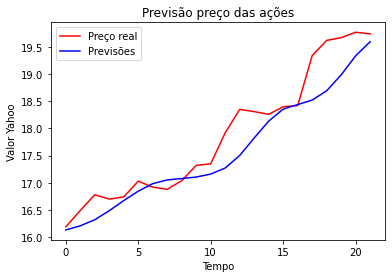

In [2]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()